In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import warnings
warnings.filterwarnings('ignore')


In [445]:
data = pd.read_csv('StressLevelDataset.csv')
pd.set_option('display.max_columns', None)
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2.0,4,2,3,3,2.0,3,2,3,3,2,3,3,NaN,1
1,15,8,1,15,5,3,1.0,4,3,1,2,2.0,1,4,1,5,1,4,5,NaN,2
2,12,18,1,14,2,1,NaN,2,2,2,3,2.0,2,3,3,2,2,3,2,NaN,1
3,16,12,1,15,4,3,1.0,3,4,2,2,2.0,2,4,1,4,1,4,4,NaN,2
4,16,28,0,7,2,3,5.0,1,3,2,4,3.0,4,3,1,2,1,5,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3.0,2,2,2,2,3.0,2,2,2,3,3,2,3,NaN,1
1096,9,12,0,8,0,3,0.0,0,0,1,3,4.0,0,1,1,1,1,3,4,NaN,2
1097,4,26,0,3,1,2,5.0,2,2,3,4,4.0,5,1,4,1,3,1,2,NaN,0
1098,21,0,1,19,5,3,1.0,4,3,1,1,1.0,2,5,1,4,1,4,4,NaN,2


In [446]:
data.shape

(1100, 21)

In [447]:
data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [448]:
data.isnull().sum()

anxiety_level                      0
self_esteem                        0
mental_health_history              0
depression                         0
headache                           0
blood_pressure                     0
sleep_quality                     70
breathing_problem                  0
noise_level                        0
living_conditions                  0
safety                             0
basic_needs                       55
academic_performance               0
study_load                         0
teacher_student_relationship       0
future_career_concerns             0
social_support                     0
peer_pressure                      0
extracurricular_activities         0
bullying                        1095
stress_level                       0
dtype: int64

In [449]:
data['sleep_quality'].value_counts()

sleep_quality
1.0    307
4.0    179
2.0    176
5.0    175
3.0    163
0.0     30
Name: count, dtype: int64

In [450]:
# We will fill mode values as the value of sleep quality is varying from 0 to 5

data['sleep_quality'] = data['sleep_quality'].fillna(data['sleep_quality'].mode()[0])

In [451]:
data.isnull().sum()

anxiety_level                      0
self_esteem                        0
mental_health_history              0
depression                         0
headache                           0
blood_pressure                     0
sleep_quality                      0
breathing_problem                  0
noise_level                        0
living_conditions                  0
safety                             0
basic_needs                       55
academic_performance               0
study_load                         0
teacher_student_relationship       0
future_career_concerns             0
social_support                     0
peer_pressure                      0
extracurricular_activities         0
bullying                        1095
stress_level                       0
dtype: int64

In [452]:
# We will fill mode values as the value of basic needs is varying from 0 to 5

data['basic_needs'] = data['basic_needs'].fillna(data['basic_needs'].mode()[0])

In [453]:
data.isnull().mean() * 100

anxiety_level                    0.000000
self_esteem                      0.000000
mental_health_history            0.000000
depression                       0.000000
headache                         0.000000
blood_pressure                   0.000000
sleep_quality                    0.000000
breathing_problem                0.000000
noise_level                      0.000000
living_conditions                0.000000
safety                           0.000000
basic_needs                      0.000000
academic_performance             0.000000
study_load                       0.000000
teacher_student_relationship     0.000000
future_career_concerns           0.000000
social_support                   0.000000
peer_pressure                    0.000000
extracurricular_activities       0.000000
bullying                        99.545455
stress_level                     0.000000
dtype: float64

In [454]:
# We will remove bullying column as it contains 99% missing values

data = data.drop(columns=['bullying'])
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,stress_level
0,14,20,0,11,2,1,2.0,4,2,3,3,2.0,3,2,3,3,2,3,3,1
1,15,8,1,15,5,3,1.0,4,3,1,2,2.0,1,4,1,5,1,4,5,2
2,12,18,1,14,2,1,1.0,2,2,2,3,2.0,2,3,3,2,2,3,2,1
3,16,12,1,15,4,3,1.0,3,4,2,2,2.0,2,4,1,4,1,4,4,2
4,16,28,0,7,2,3,5.0,1,3,2,4,3.0,4,3,1,2,1,5,0,1


In [455]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
stress_level                    0
dtype: int64

In [456]:
# Saving the test data to a CSV file
data.to_csv('final_stress_dataset.csv', index=False)

In [332]:
desc = data.describe()
report_df = pd.DataFrame(desc).T
report_df

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.553636,1.542198,0.0,1.0,2.0,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


## Exploratory Data Analysis

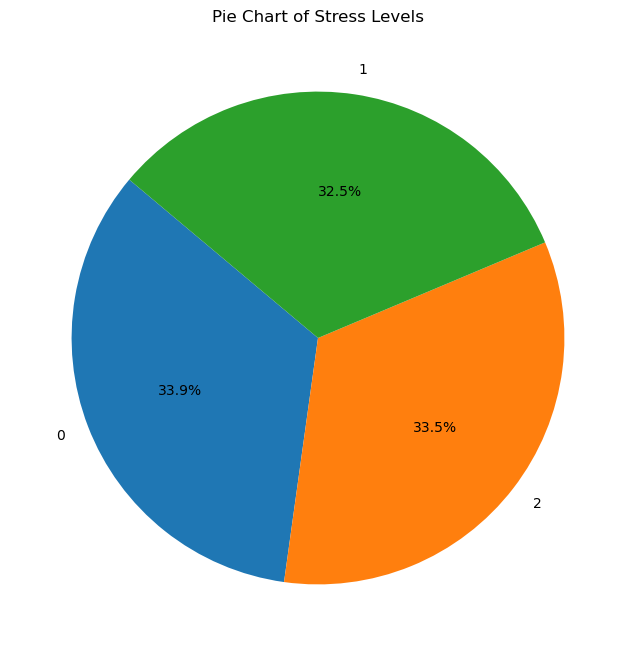

In [326]:
# Assuming 'data' is your DataFrame and it contains a column named 'stress_level'
stress_level_counts = data['stress_level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
stress_level_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Stress Levels')
plt.ylabel('')  # Hide the y-label
plt.show()

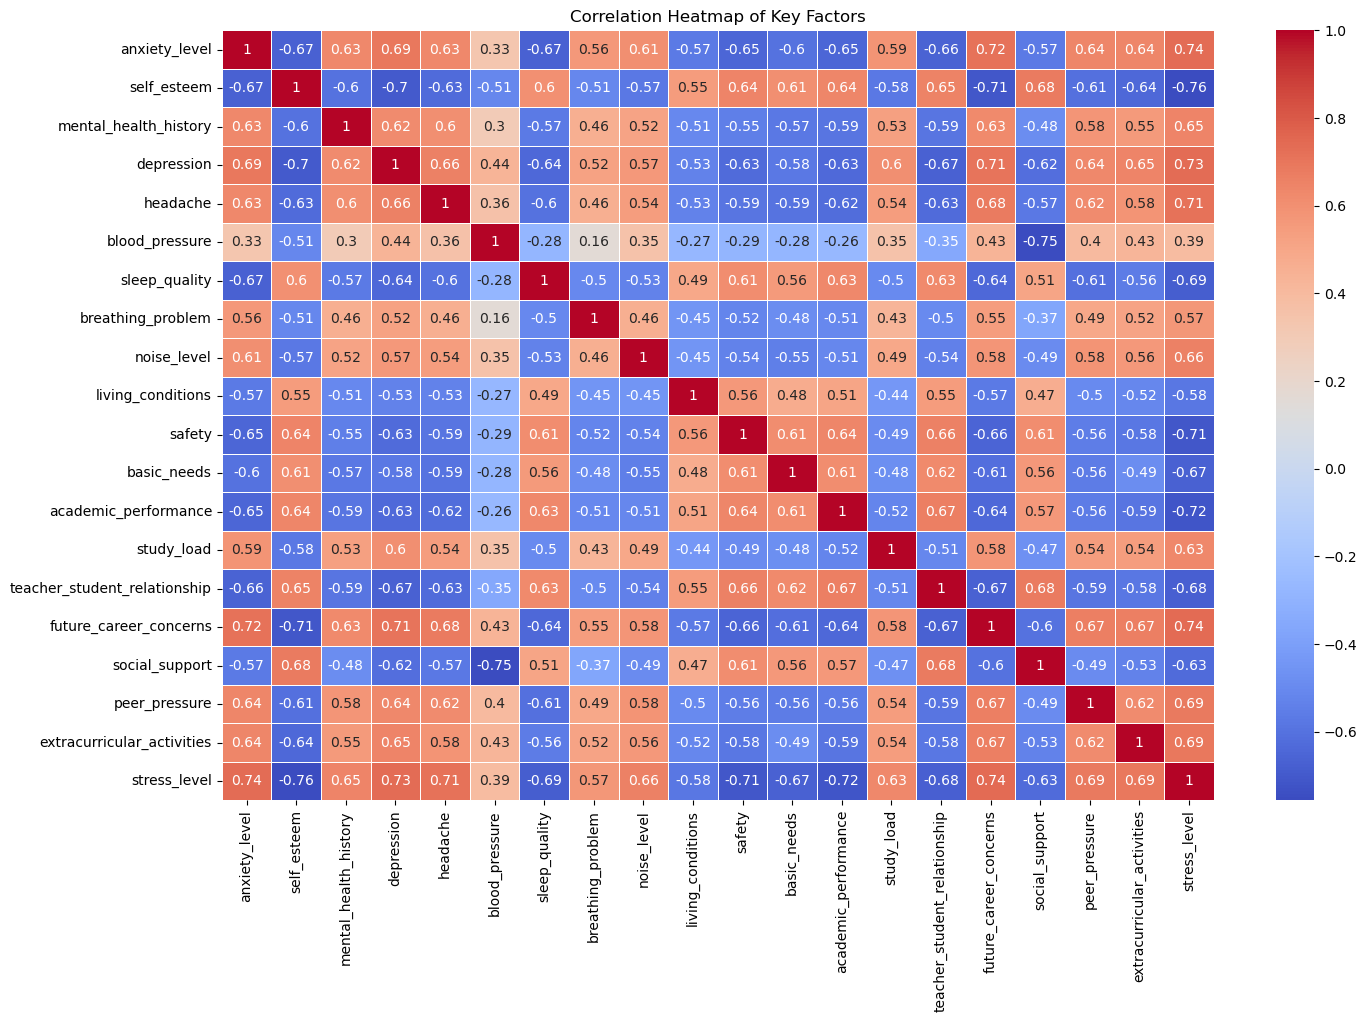

In [325]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()

In [47]:
# Average self steem
avg_self_steem = data['self_esteem'].mean().round(2)

# Students with below average self steem
below_avg_self_steem = data[data['self_esteem'] < avg_self_steem]['self_esteem'].count()

In [335]:
len(data)-below_avg_self_steem

593

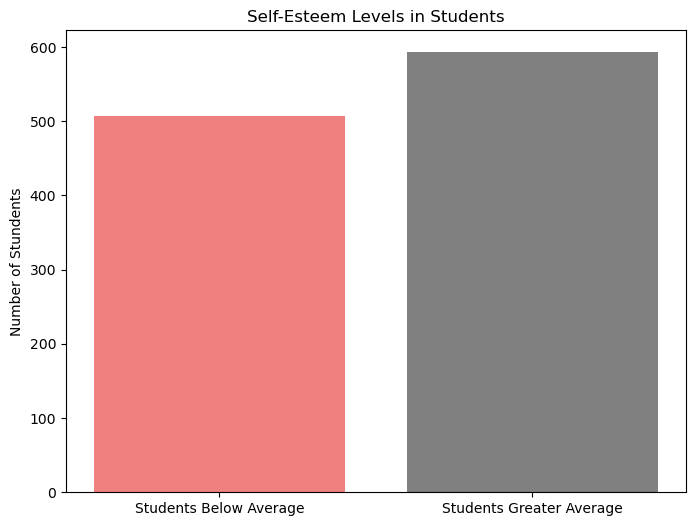

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(['Students Below Average', 'Students Greater Average'], [below_avg_self_steem, len(data)-below_avg_self_steem], color=['lightcoral', 'gray'])
plt.title('Self-Esteem Levels in Students')
plt.ylabel('Number of Stundents')
plt.show()

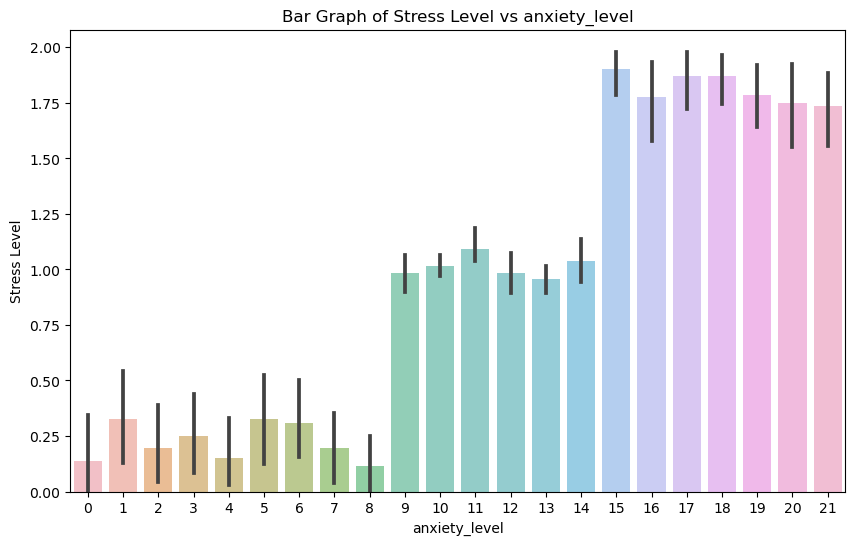

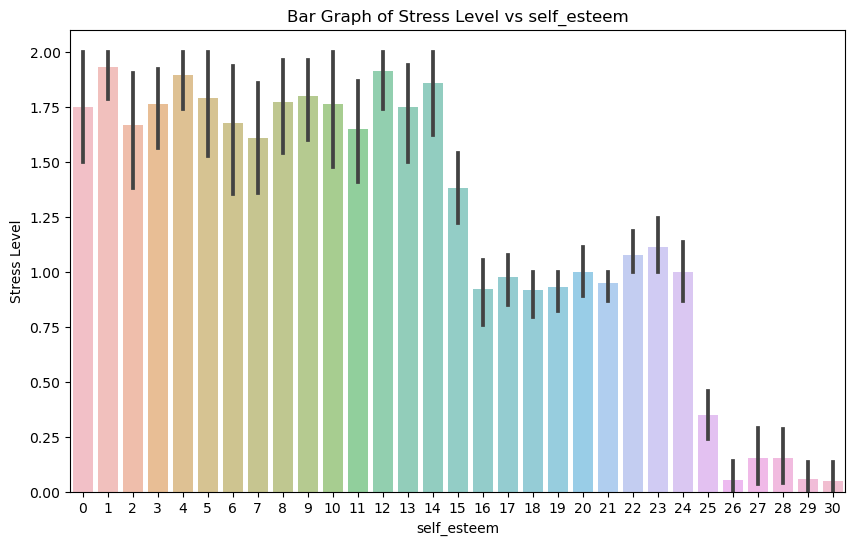

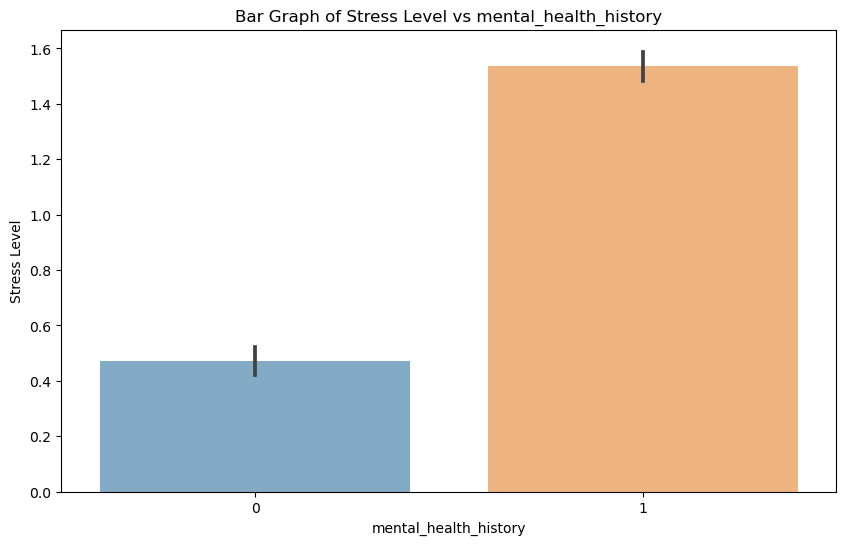

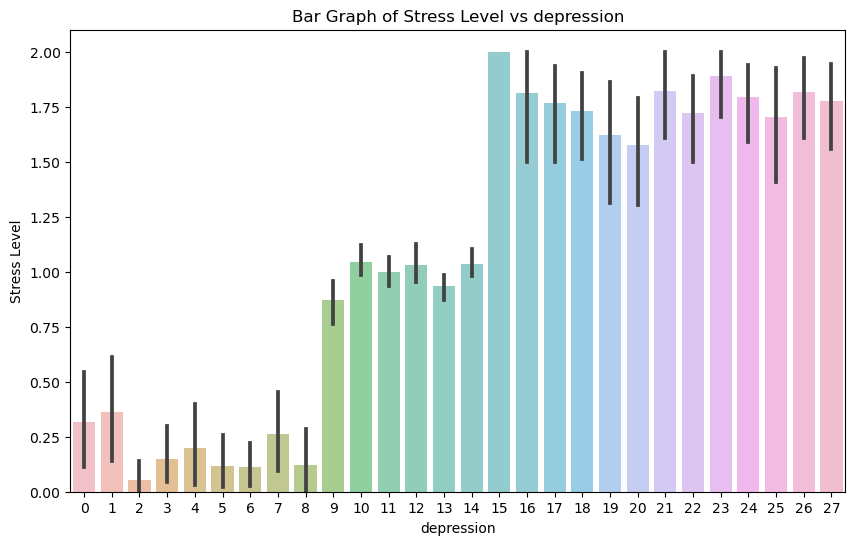

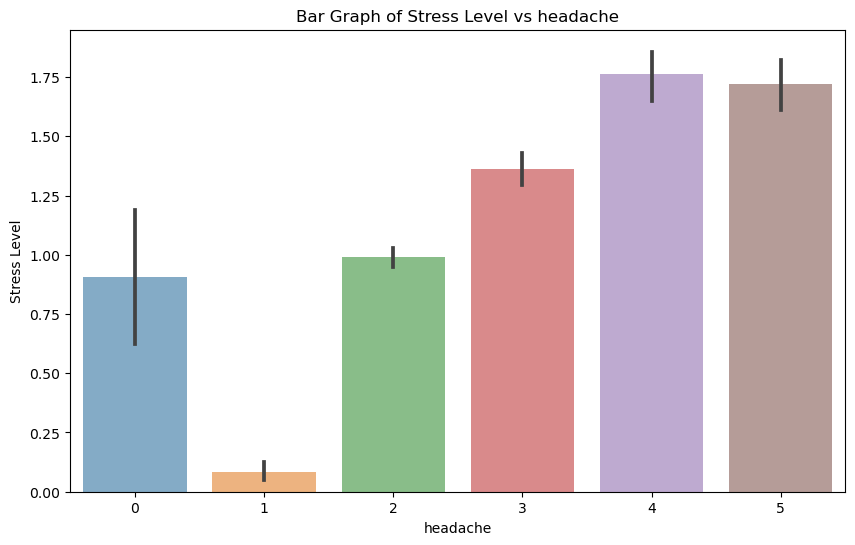

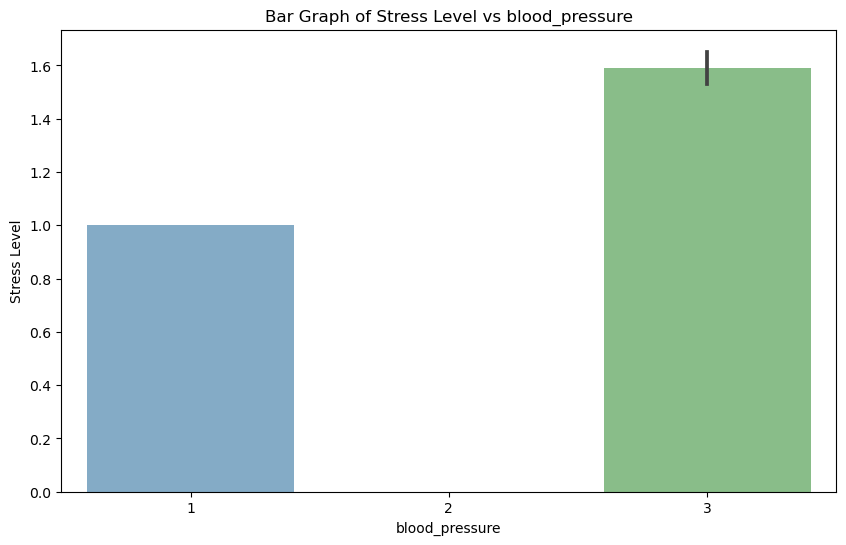

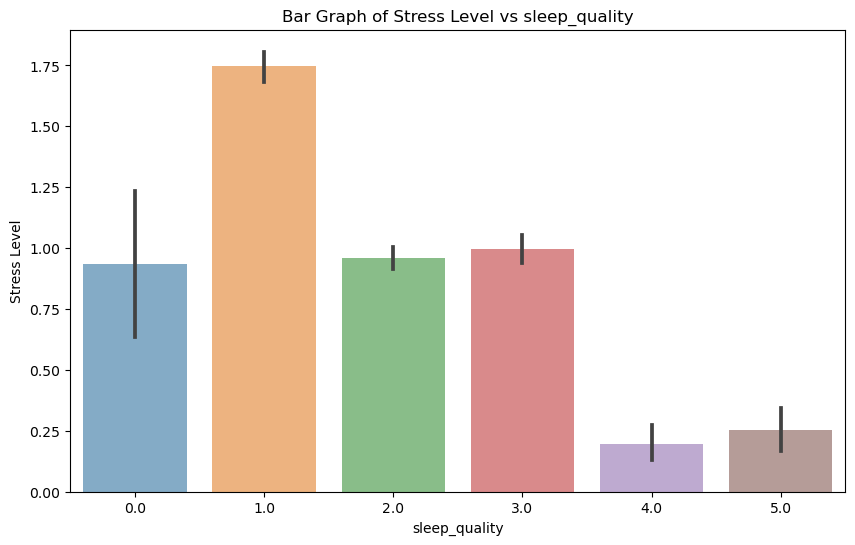

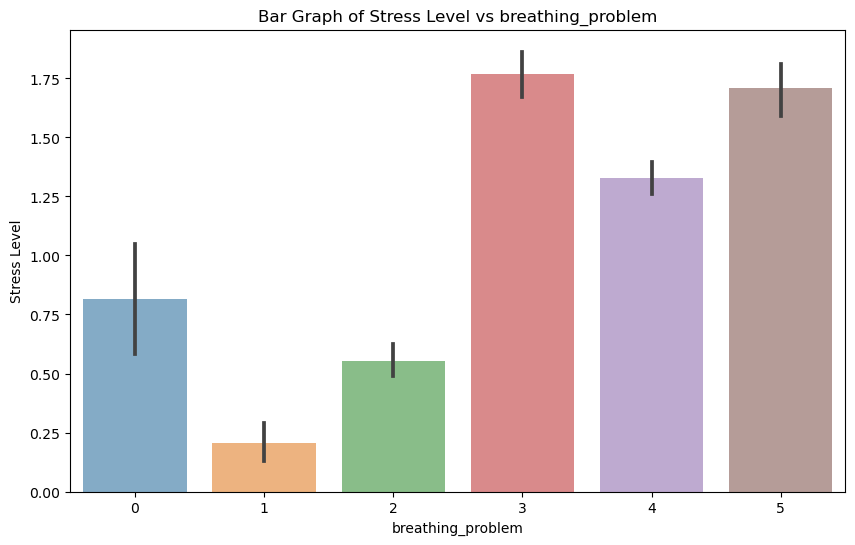

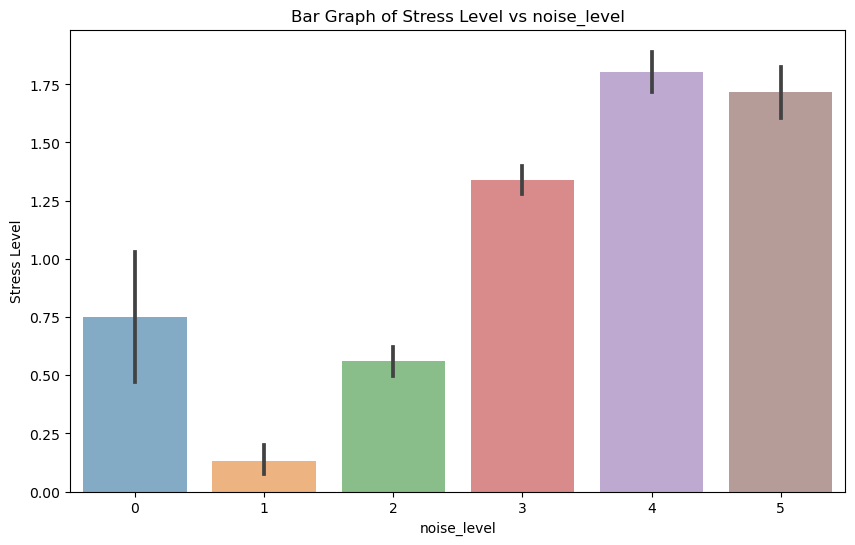

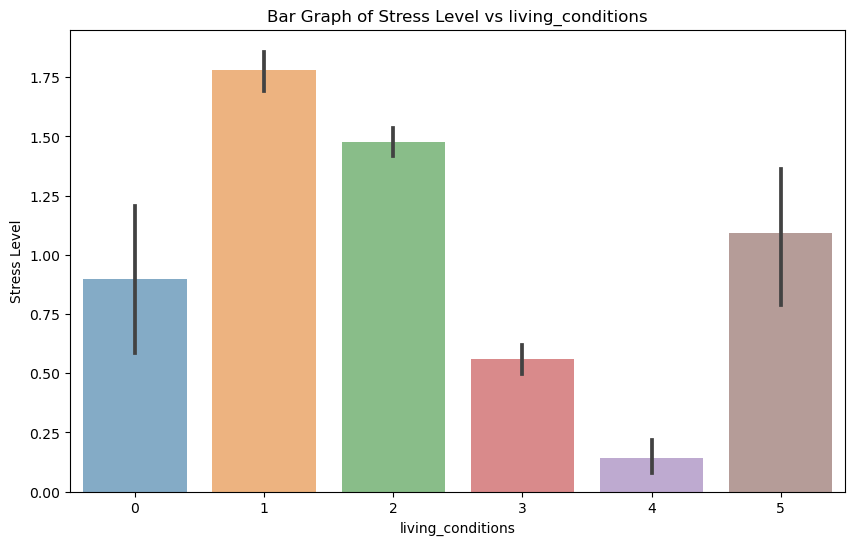

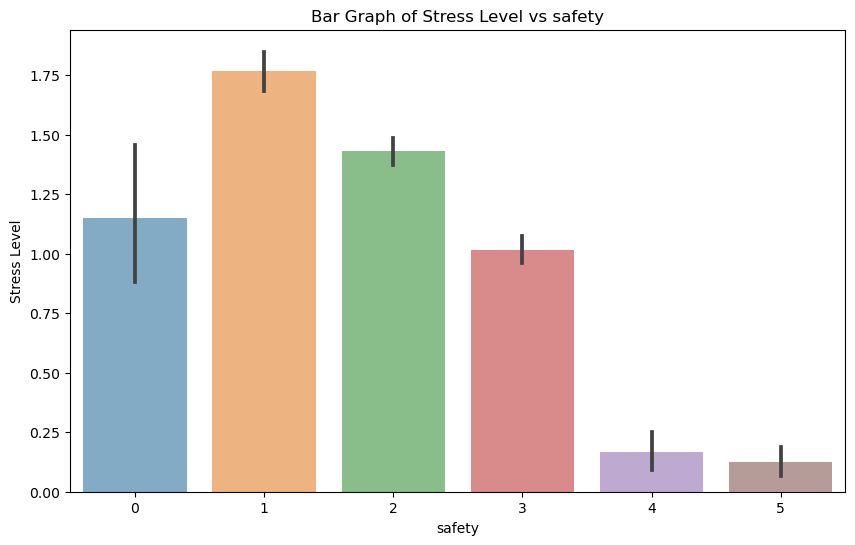

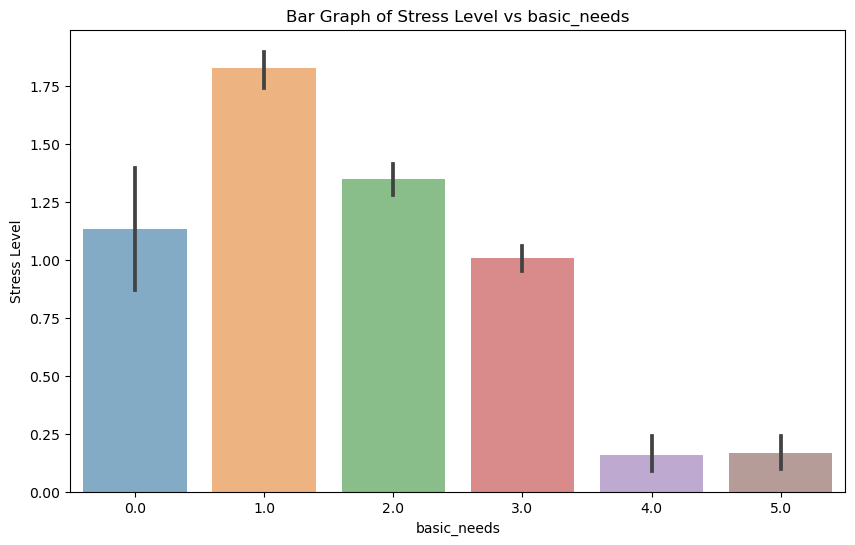

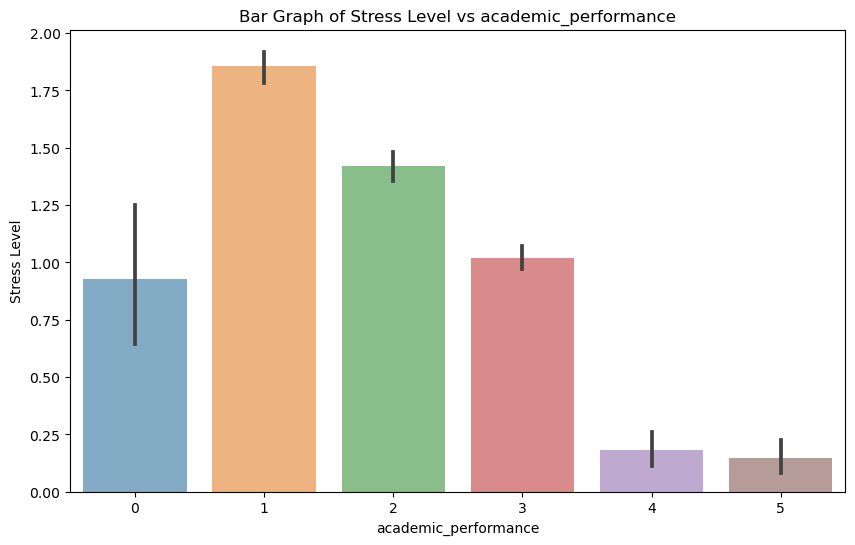

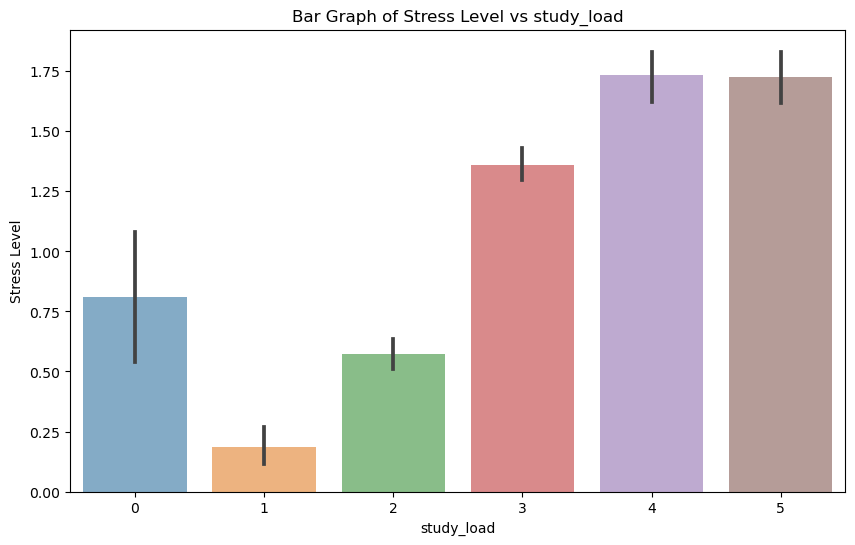

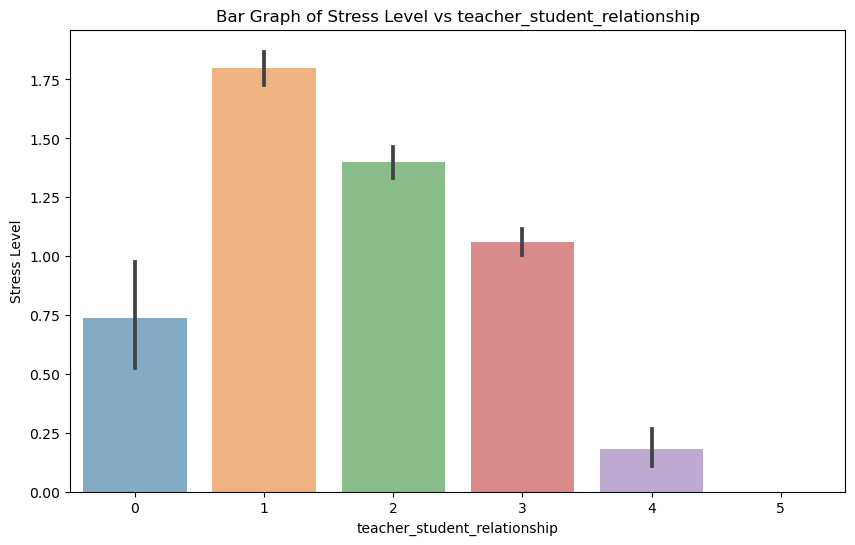

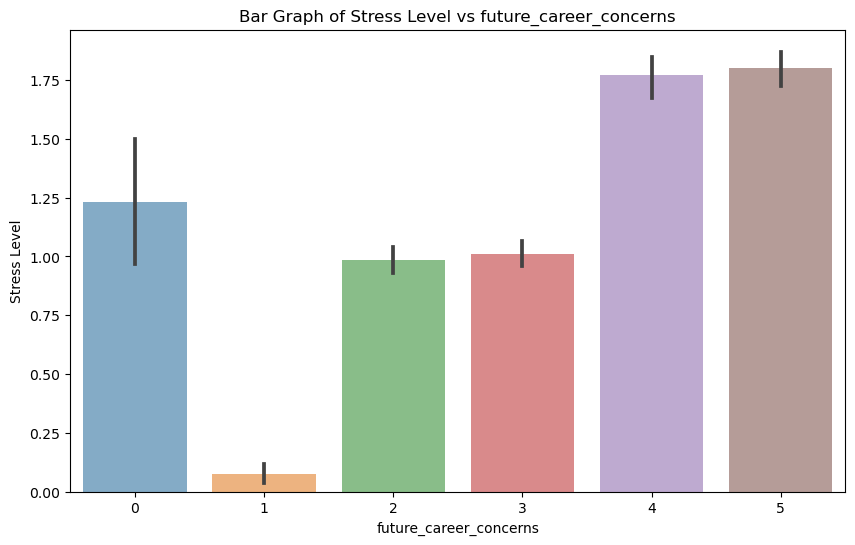

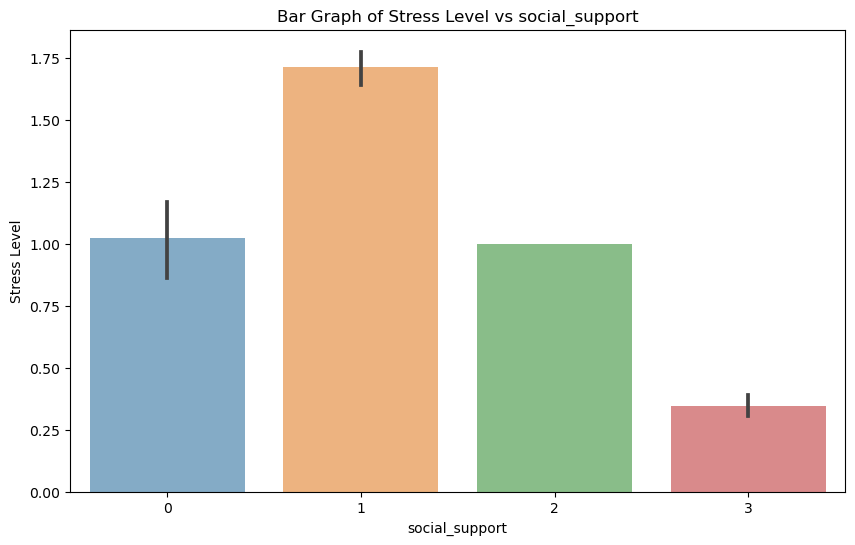

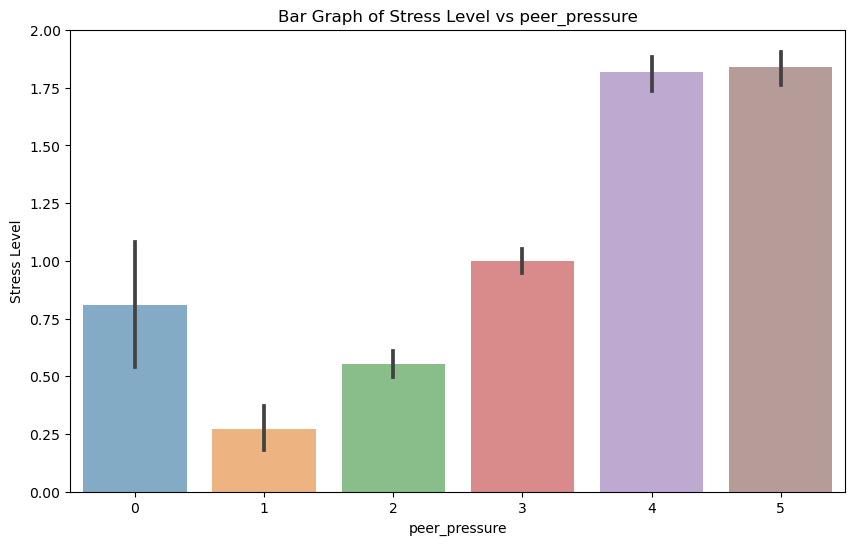

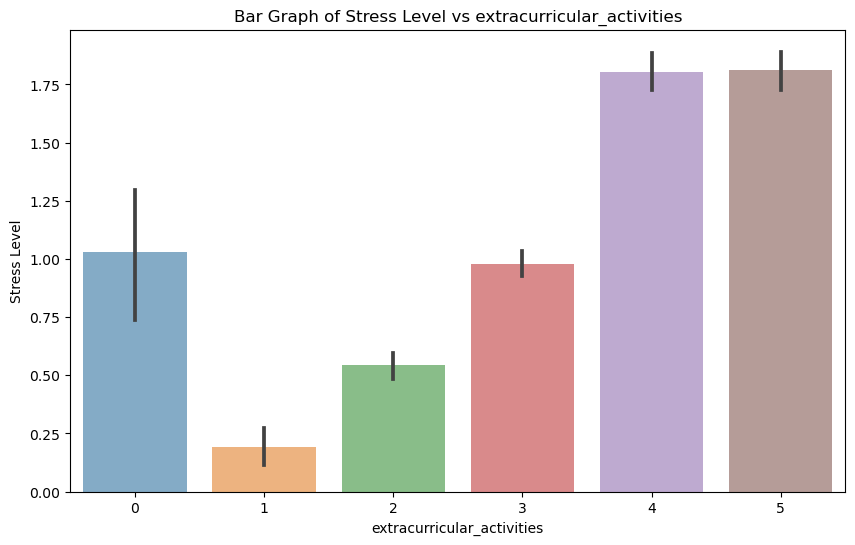

In [56]:
columns_to_plot = data.columns[:]

for column in columns_to_plot:
    if column != 'stress_level':
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x=column, y='stress_level', alpha=0.6)
        plt.title(f'Bar Graph of Stress Level vs {column}')
        plt.xlabel(column)
        plt.ylabel('Stress Level')
        plt.show()

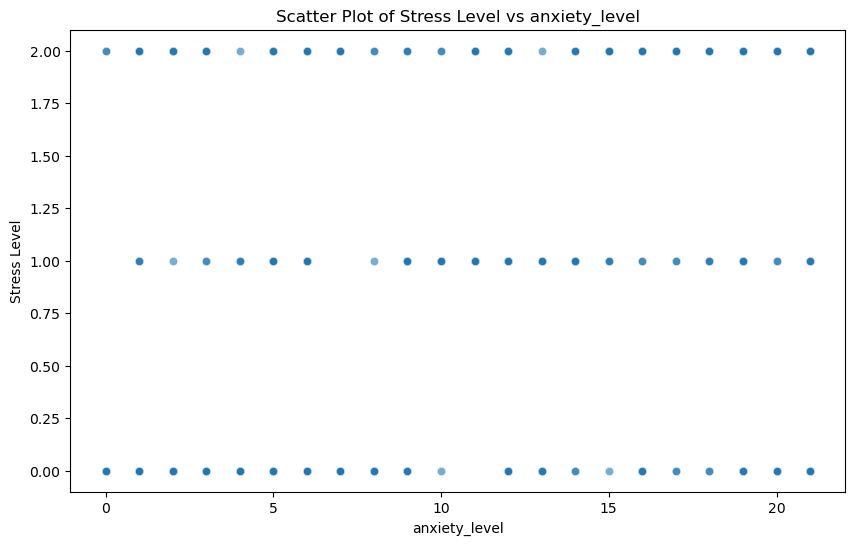

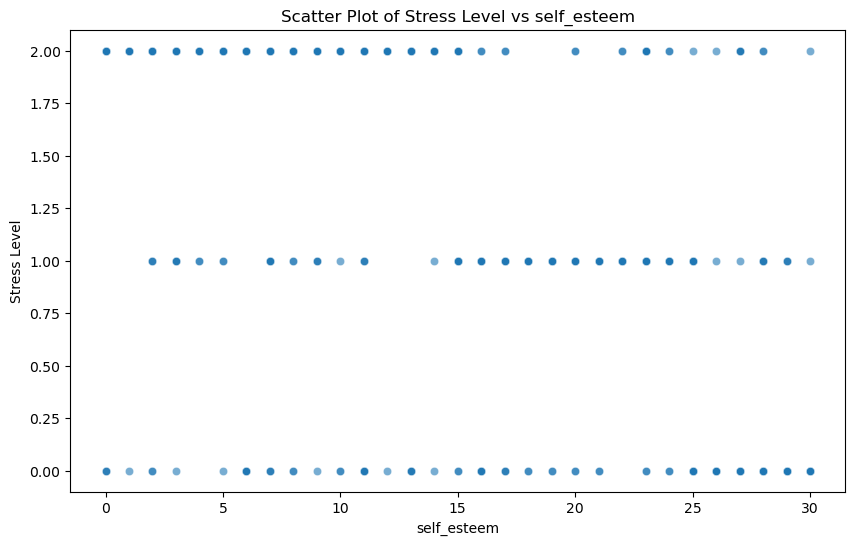

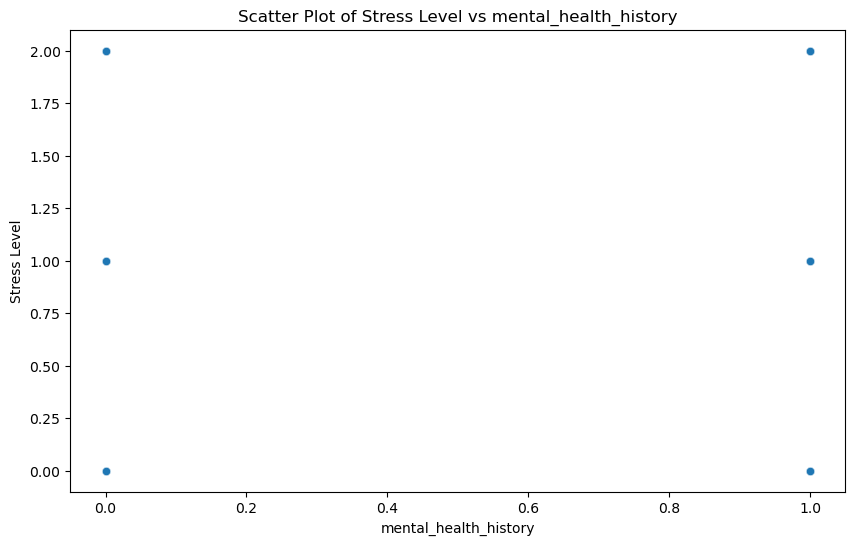

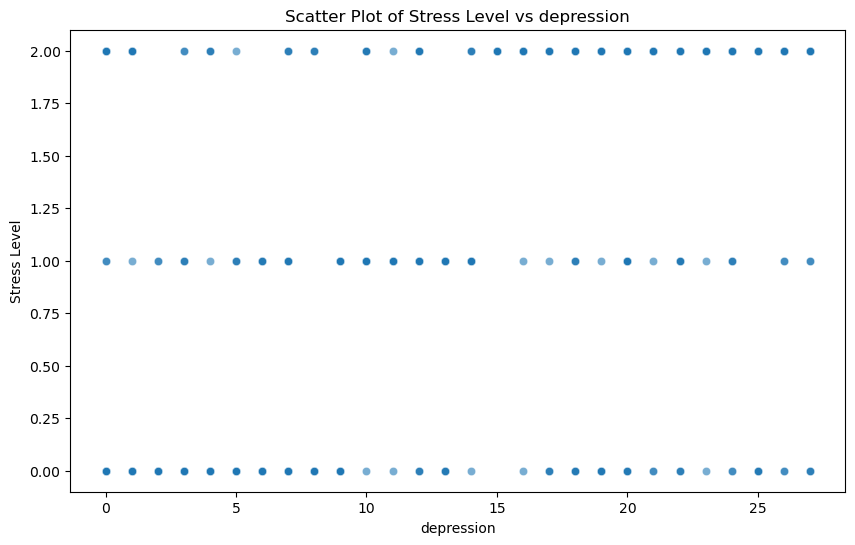

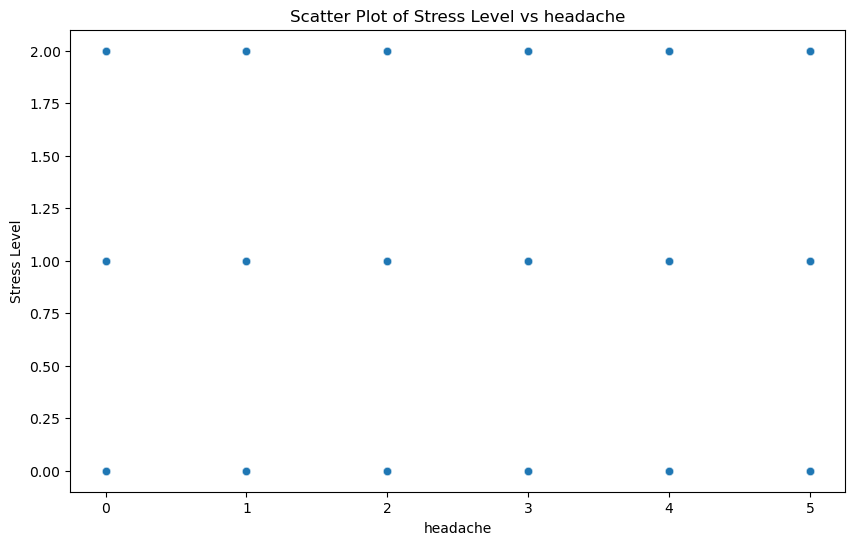

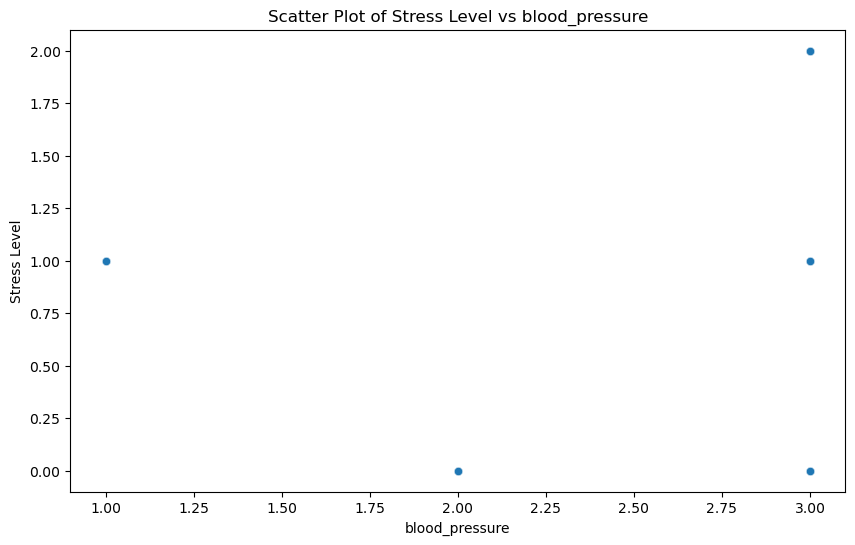

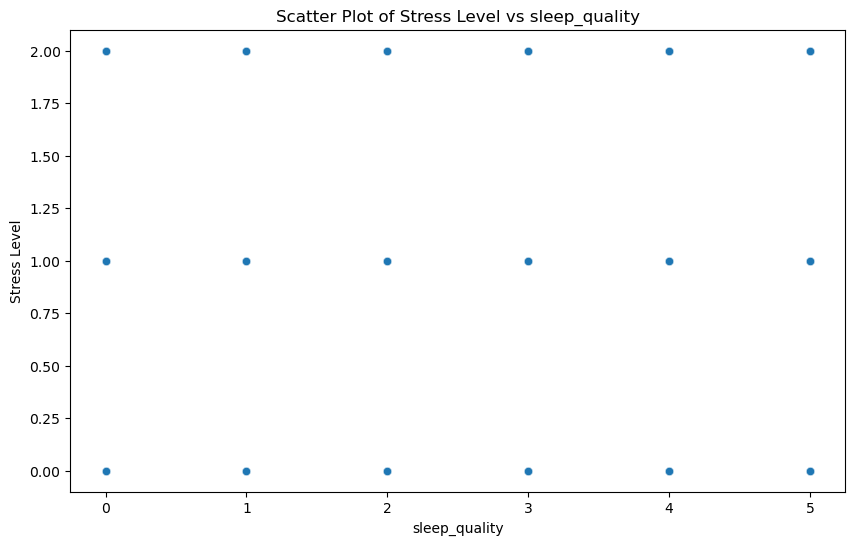

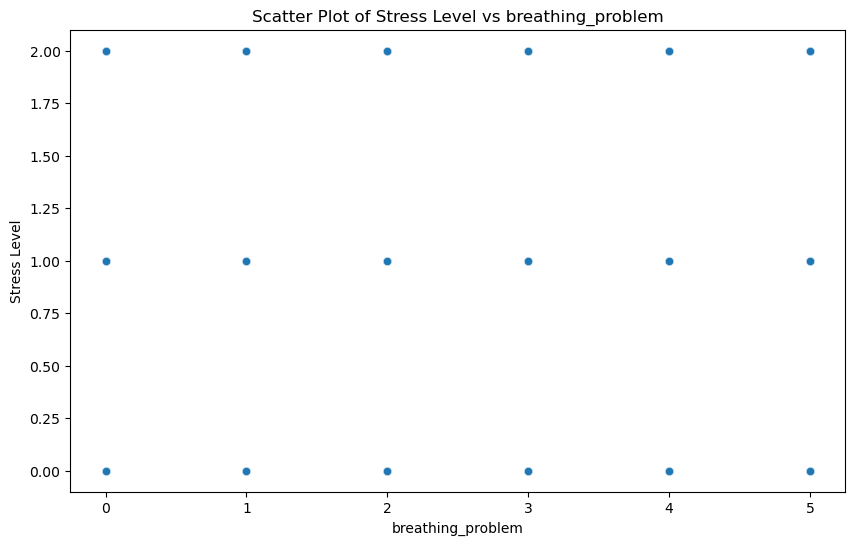

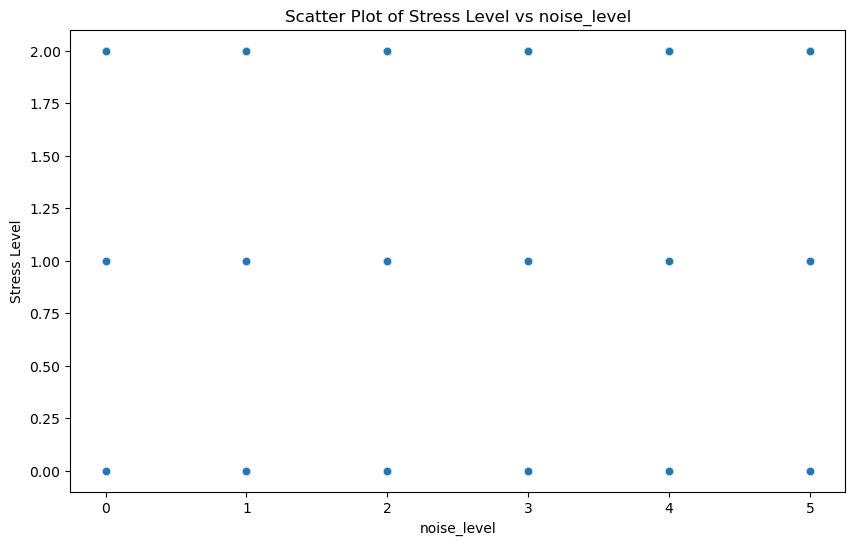

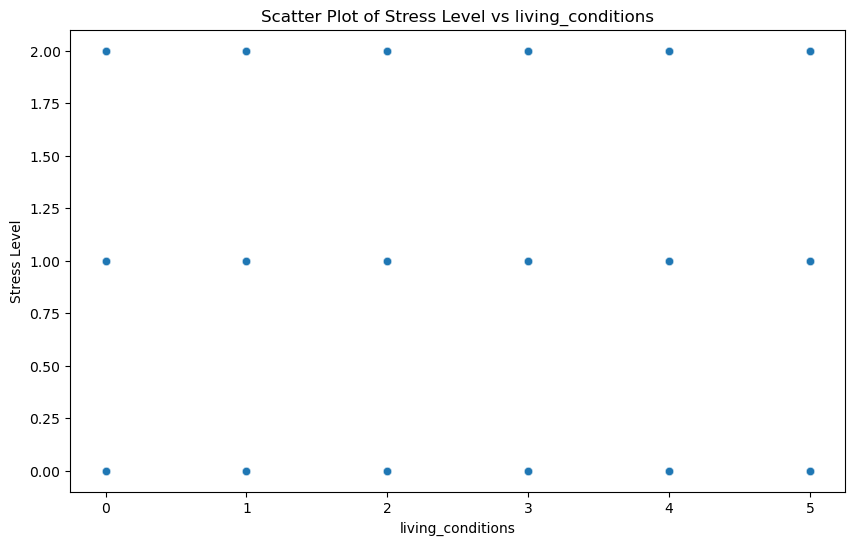

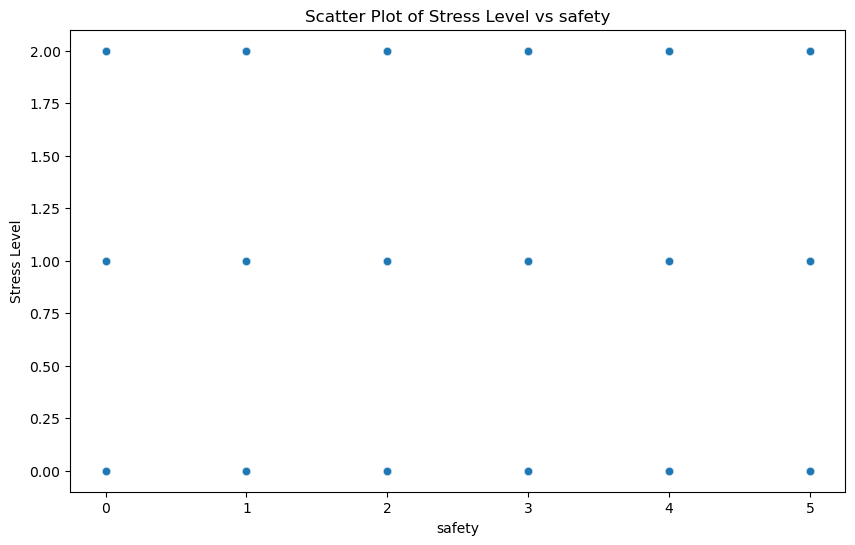

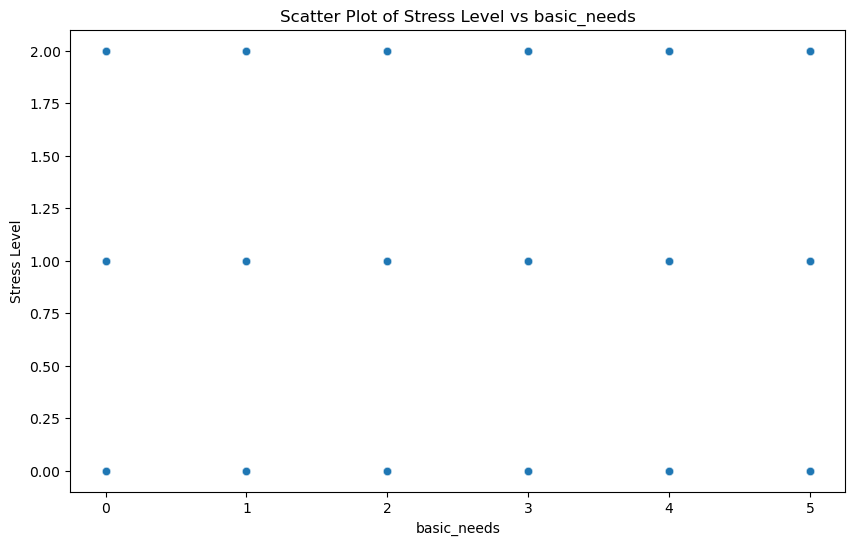

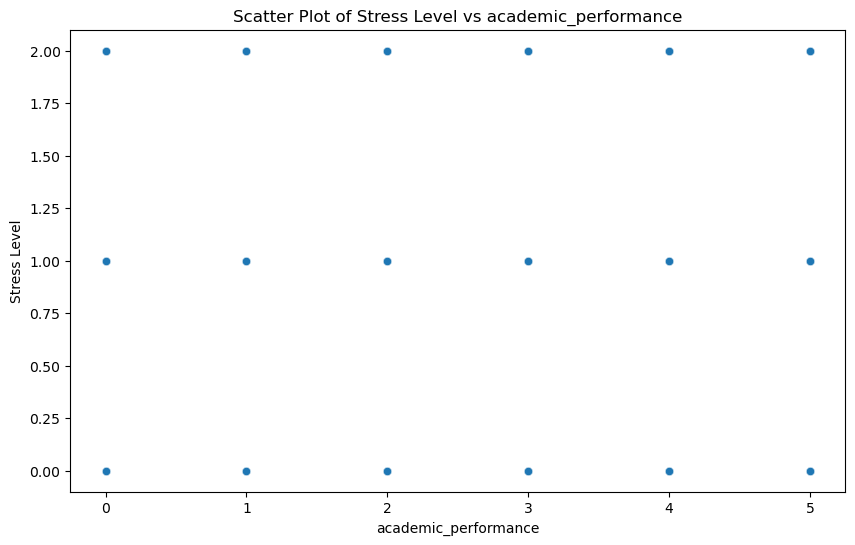

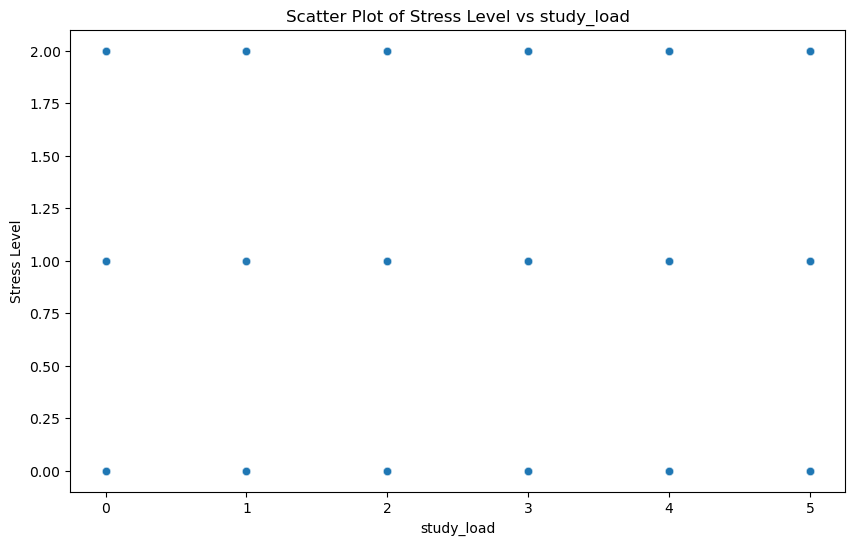

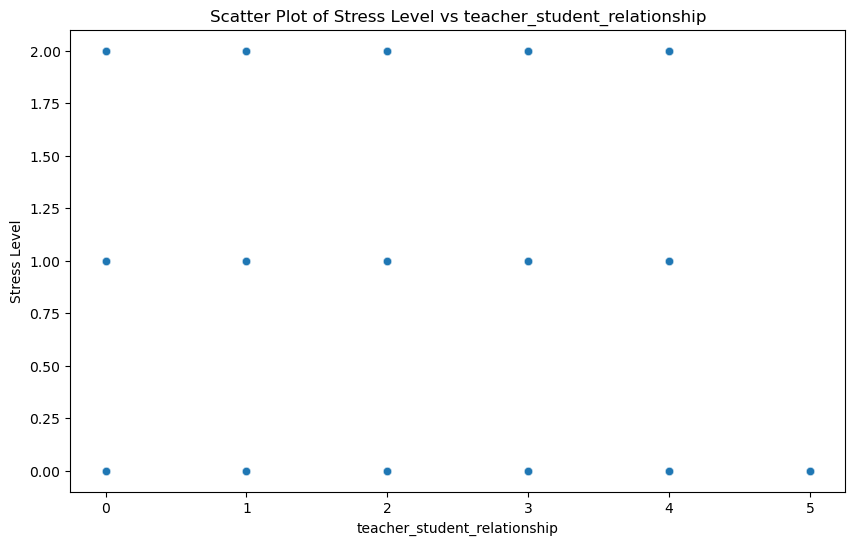

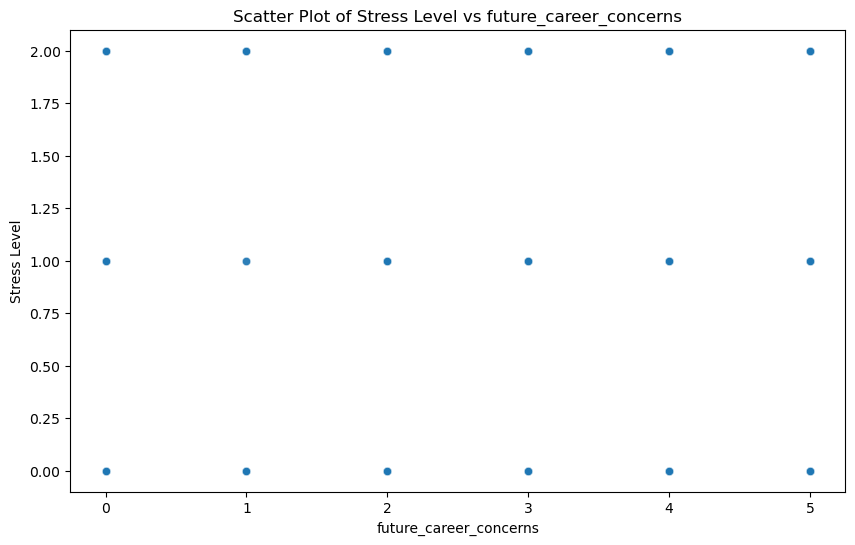

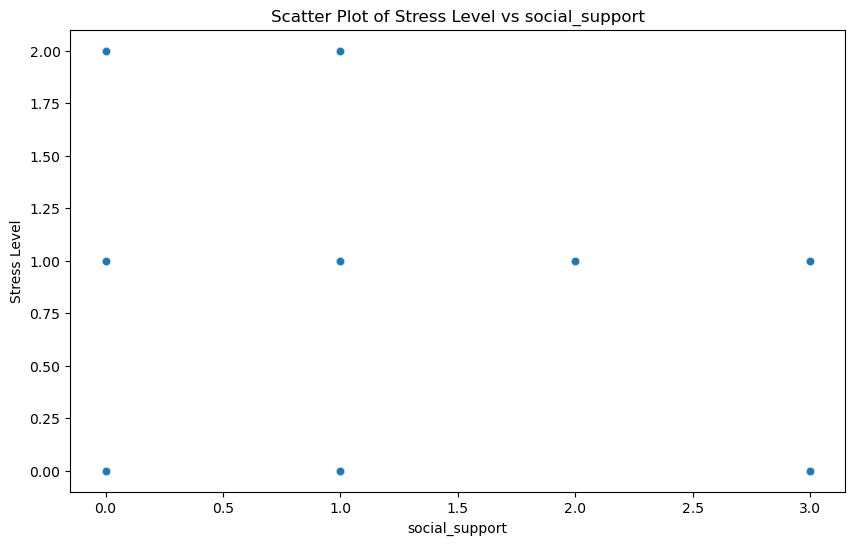

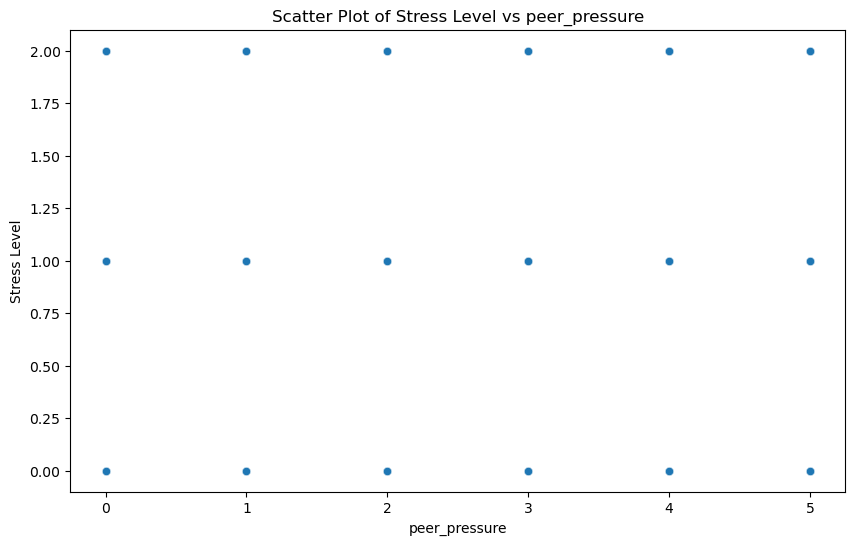

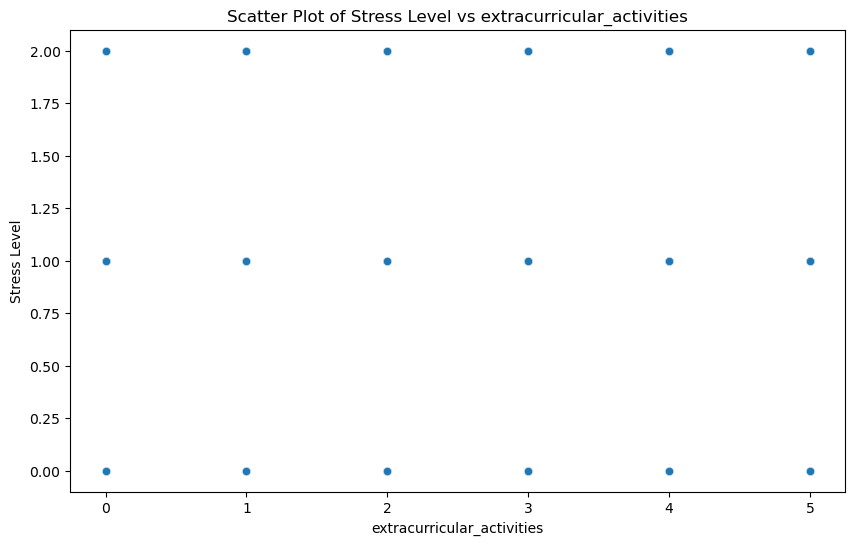

In [57]:
columns_to_plot = data.columns[:]

for column in columns_to_plot:
    if column != 'stress_level':
        # Creating the scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=column, y='stress_level', alpha=0.6)
        plt.title(f'Scatter Plot of Stress Level vs {column}')
        plt.xlabel(column)
        plt.ylabel('Stress Level')
        plt.show()

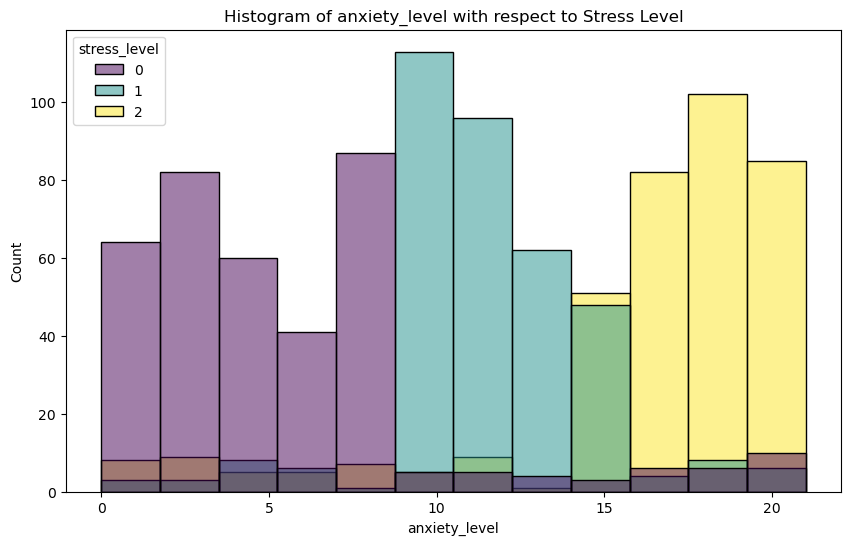

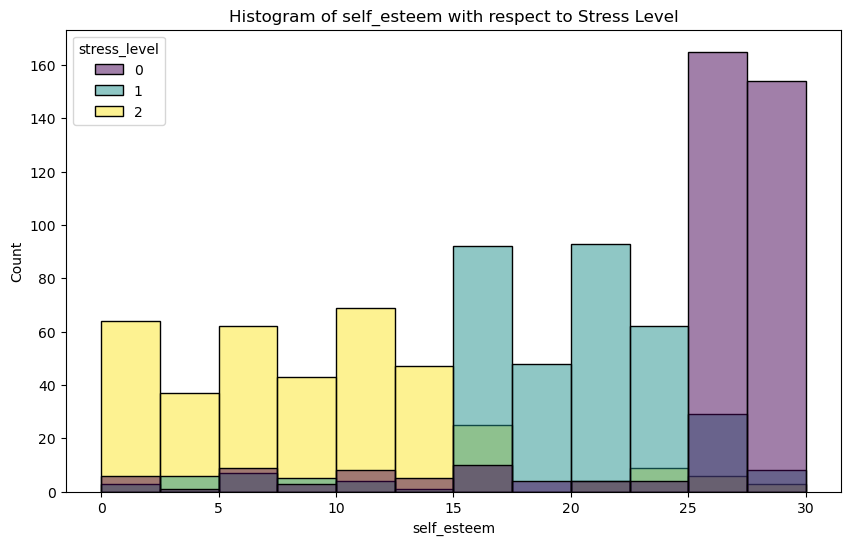

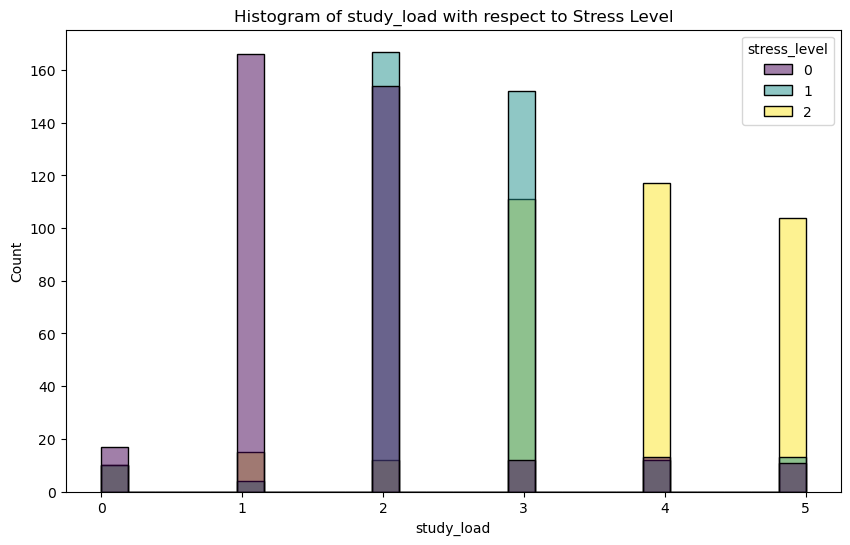

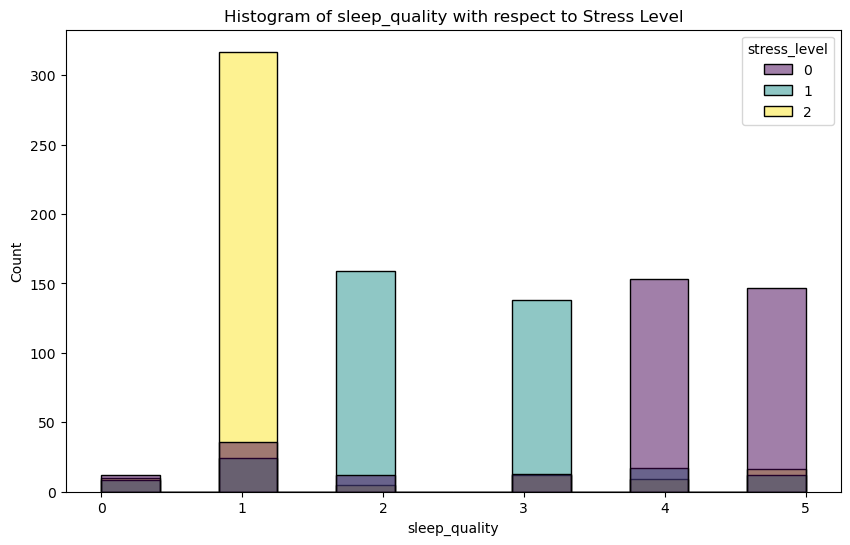

In [278]:
numerical_columns = ['anxiety_level', 'self_esteem', 'study_load', 'sleep_quality']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='stress_level',palette='viridis',  stat='count')
    plt.title(f'Histogram of {column} with respect to Stress Level')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [165]:
# We use feature_importances_ function of random forest to find the important features

importances = classifier.feature_importances_
importances_series = pd.Series(importances)

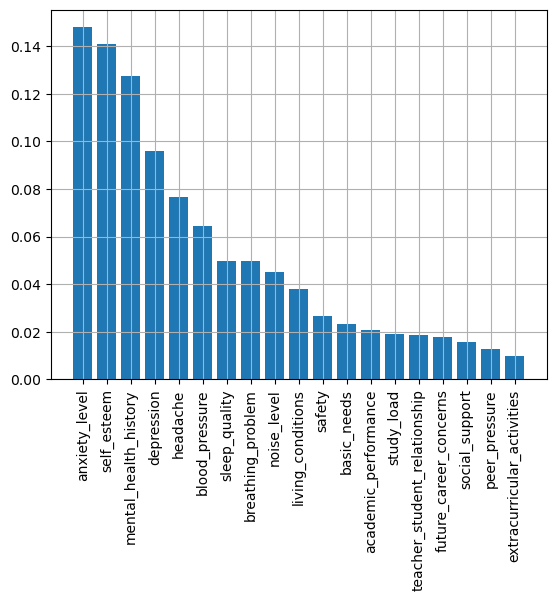

In [166]:
ordered_importances = importances_series.sort_values(ascending=False)
plt.bar(X.columns,ordered_importances)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Saving Test Data

In [473]:
# Concatenating X_test and y_test to form the complete test dataset
test_data = pd.concat([X_test, y_test], axis=1)

# Saving the test data to a CSV file
test_data.to_csv('test_data.csv', index=False)